# Downloading CDCS

In [ ]:
!pip install beautifulsoup4 --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 5.8 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [37]:
import requests
import os
from bs4 import BeautifulSoup


#
#   Python script to scrape CDCS documents from usaid.gov
#   This script uses bs4. You may need to install bs4:
#       pip install bs4
#
# Wrapper to get the text content (html) from a page
def get_html(link):
    res = requests.get(link)
    txt = res.text
    res.close()
    return txt

# Wrapper to get the content from a page
def get_content(link):
    res = requests.get(link)
    content = res.content
    res.close()
    return content
    
# Check if a link contains '/' (located on host domain)
def check_link(link):
    if link[0] == '/':
        return 'https://www.usaid.gov'  + link
    else:
        return link


# Get webpage
soup = BeautifulSoup(get_html('https://www.usaid.gov/results-and-data/planning/country-strategies-cdcs'), 'html.parser')

    
# Make a directory to store
if not os.getcwd().split("\\")[-1] == "CDCS" and not os.path.exists("CDCS"):
    os.mkdir("CDCS")
os.chdir("CDCS")


# Display dictionary
print("Pages Results")
print("====================================================================") 

# Obtain links to pdfs located on main site
# soup.select uses a CSS selector to obtain the link
pages = {}
idx = 1
for link in soup.select('div[class*="wysiwyg"] > a:first-child'):
    # Try to go to the link referenced
    # Access subpage and search for pdf
    child = BeautifulSoup(get_html(check_link(link.get("href"))), 'html.parser')
    pdf_attr = child.select('a[href*="pdf"]')

    # Error
    if not pdf_attr:
        pages[link.text] = "Not found"
        print("%d:%24s\t%s" % (idx, link.text[:20], "Not found"))
        # Exit 1 
        idx += 1;
        continue
    
    # Visit pdf link
    # Handle multiple links
    pdf_link = pdf_attr[0].get("href")
    if len(pdf_attr) > 1:
        for lnk in pdf_attr:
            # Language edgecase. Not comprehensive. TODO?
            if "title" in lnk.attrs and "Español" in (lnk["title"] or "Spanish" in lnk["title"]):
                continue
        
            if "class" in lnk.attrs and "usaid-link" in lnk["class"]:
                pdf_link = lnk.get("href")
    
    # Update link
    pdf_link = check_link(pdf_link)
        
    # Check if file exists
    if os.path.isfile(link.text + " CDCS.pdf"):
        pages[link.text] = pdf_link
        print("%d:%24s\t%s" % (idx, link.text[:20], pdf_link))
        # Exit 2
        idx += 1;
        continue

    # Write
    # MAYBE TODO: it is possible that the link returns a 404
    pdf = open(link.text + " CDCS.pdf", "wb")
    pdf.write(get_content(pdf_link))
    pdf.close()
    
    # Exit 3
    print("%d:%16s\t%s" % (idx, link.text[:12], pdf_link))
    pages[link.text] = pdf_link
    idx += 1;
    

Pages Results
1:          Angola	https://www.usaid.gov/sites/default/files/2022-05/Angola_CDCS_2014-2019.pdf
2:    Democratic R	https://www.usaid.gov/sites/default/files/2022-05/Public_CDCS-DRC-12-2025.pdf
3:        Ethiopia	https://www.usaid.gov/sites/default/files/2022-05/Ethiopia-CDCS_2019-2024_Final-Public-Dec-2019-2.pdf
4:          Ghana 	https://www.usaid.gov/sites/default/files/2022-05/CDCS-Ghana-August-2025x.pdf
5:          Guinea	https://www.usaid.gov/sites/default/files/2022-05/CDCS_Guinea_Dec_2025_2.pdf
6:           Kenya	https://www.usaid.gov/sites/default/files/2022-05/Kenya_CDCS_External_Sept_2021.pdf
7:         Liberia	https://www.usaid.gov/sites/default/files/2022-05/CDCS_Liberia_June_2024.pdf
8:      Madagascar	https://www.usaid.gov/sites/default/files/2022-06/CDCS-Madagascar-September-2025_112020.pdf
9:          Malawi	https://www.usaid.gov/sites/default/files/2022-05/EXTERNAL_CDCS_Malawi_2020-2025_-_Exp_April_2025_508_1.50.43_PM.pdf
10:            Mali	https://www.us

# Preprocessing into Bag of Words

In [8]:
!pip install PyPDF2

In [2]:
from PyPDF2 import PdfReader
import os

# If not in directory, move into it
if not os.getcwd().split("\\")[-1] == "CDCS":
    os.chdir("CDCS")

# Get text from all pdfs
titles = []
documents = []
i = 0
for fname in os.listdir():
    if fname.find("CDCS.pdf") != -1:
        
        # Try reading, catching erros
        reader = None
        try:
            reader = PdfReader(fname)
        except:
            print("\nError reading", fname)
            continue
        
        # Extract text from a pdf
        all_text = ""
        for page in reader.pages:
            all_text += page.extract_text()
        
        documents.append(all_text)
        titles.append(fname[:fname.find("CDCS.pdf") - 1])
        
        # Print for progress
        i += 1
        if i % 4 == 0:
            print("")
            i = 0
        print(fname, end=" ")
print("")

Albania CDCS.pdf Angola CDCS.pdf Armenia CDCS.pdf 
Bangladesh CDCS.pdf Bosnia and Herzegovina CDCS.pdf Cambodia CDCS.pdf Central Asia CDCS.pdf 
Democratic Republic of the Congo CDCS.pdf Egypt CDCS.pdf El Salvador CDCS.pdf Ethiopia CDCS.pdf 
Georgia CDCS.pdf Ghana  CDCS.pdf Guatemala CDCS.pdf Guinea CDCS.pdf 
Honduras CDCS.pdf India CDCS.pdf Indonesia CDCS.pdf Jamaica CDCS.pdf 
Jordan CDCS.pdf Kenya CDCS.pdf Kosovo CDCS.pdf Kyrgyz Republic CDCS.pdf 
Lebanon CDCS.pdf Liberia CDCS.pdf Madagascar CDCS.pdf Malawi CDCS.pdf 
Mali CDCS.pdf Mexico CDCS.pdf Moldova CDCS.pdf Morocco CDCS.pdf 
Mozambique CDCS.pdf Nepal CDCS.pdf Niger CDCS.pdf Pakistan CDCS.pdf 
Paraguay CDCS.pdf Peru CDCS.pdf Philippines CDCS.pdf Regional Development Cooperation Strategy CDCS.pdf 
Error reading Rwanda CDCS.pdf

Serbia CDCS.pdf Somalia CDCS.pdf South Africa CDCS.pdf Sri Lanka CDCS.pdf 
Tanzania CDCS.pdf Timor-Leste CDCS.pdf Tunisia CDCS.pdf Ukraine CDCS.pdf 
Vietnam CDCS.pdf West Africa Regional CDCS.pdf Zambia CDC

In [136]:
import re

# Clean the text
# It may be more effective to do it here rather than using vectorizer 
# because it may "fix" some words

# Considerations:         
# remove numbers?    
# remove non-english characters?
# remove common words such as usaid?
# autocorrect? also some words seemed to be split by a random space
# only scan certain sections?

for i in range(len(documents)):
    # This will get rid of: non-words, digits
    documents[i] = re.sub("[^\w ]|\d", "", documents[i]).lower()

In [166]:
import pandas as pd
import sklearn.feature_extraction as skft
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


ADD_STOPWORDS = ["usaid", "usaids", "agency", 
                 "international", "development", 
                 "unclassified", "embassy", "approved", 
                 "public", "release", "cdcs", "mission"]
stwords = skft.text.ENGLISH_STOP_WORDS.union(ADD_STOPWORDS)


# Convert documents into bag of words
# This also drops terms that do not appear in at least 5% of the documents
vectorizer = CountVectorizer(stop_words=stwords, lowercase=True, min_df=0.05)
raw_bag = vectorizer.fit_transform(documents)
bag = pd.DataFrame(data=raw_bag.toarray(), columns = vectorizer.get_feature_names(), index=titles)

tfidf_vect = TfidfTransformer()
tfidf_bag = tfidf_vect.fit_transform(bag)
tfidf = pd.DataFrame(data=tfidf_bag.toarray(), columns = vectorizer.get_feature_names(), index=titles)

In [ ]:
# Save results 
import json
with open('title.json', 'w', encoding='utf-8') as f:
    json.dump(titles, f, ensure_ascii=False, indent=4)

with open('cdcsraw.json', 'w', encoding='utf-8') as f:
    json.dump(documents, f, ensure_ascii=False, indent=4)
    
# Write the as csv so the process doesn't need to be repeated
bag.to_csv('cdcs_bag.csv') 
tfidf.to_csv('cdcs_tfidf.csv') 

# Analysis

## Reloading the file if necessary

In [59]:
import pandas as pd

bag = pd.read_csv("cdcs_bag.csv")
bag = bag.rename(columns = {'Unnamed: 0':'Nation'}).set_index("Nation")

tfidf = pd.read_csv("cdcs_tfidf.csv")
tfidf = tfidf.rename(columns = {'Unnamed: 0':'Nation'}).set_index("Nation")

documents = None
with open('cdcsraw.json') as f:
    documents = list(json.load(f).items())

## Keyword analysis

In [212]:
import re

# The format of the keywords file should be
# name
# keyword|keyword2|keyword3              (on a single line)
kwords = {}
with open('keywords.txt') as k:
    kdoc = k.read()
    spl = re.compile("\n").split(kdoc)
    
    # A simple algorithm that matches the previous non-empty line
    tag_name = None
    for s in spl:
        if not re.match("\s+", s):
            if tag_name:
                kwords[tag_name] = s
                tag_name = None
            else:
                tag_name = s
kwords.keys()

dict_keys(['Civil Society', 'Governance', 'Corruption', 'Human Rights', 'Independent Media and Free Flow of Information', 'Political Competition and Consensus Building', 'Rule of Law', "Women's Political Participation and Leadership", 'Youth', 'Environment & Climate Change', 'Migration', 'Misinformation'])

In [249]:
def country_keywords_count(country, kword):
    return len(re.findall(kwords[kword], documents[titles.index(country)]))

def county_keywords_breakdown(country):
    result = {}
    for k in kwords.keys():
        result[k] = country_keywords_count(country, k)
    return result

In [250]:
print(country_keywords_count("Zambia", "Rule of Law"))
print(county_keywords_breakdown("Jordan"))
print(county_keywords_breakdown("Albania"))

27
{'Civil Society': 162, 'Governance': 340, 'Corruption': 5, 'Human Rights': 88, 'Independent Media and Free Flow of Information': 102, 'Political Competition and Consensus Building': 19, 'Rule of Law': 60, "Women's Political Participation and Leadership": 98, 'Youth': 111, 'Environment & Climate Change': 19, 'Migration': 4, 'Misinformation': 0}
{'Civil Society': 35, 'Governance': 62, 'Corruption': 17, 'Human Rights': 3, 'Independent Media and Free Flow of Information': 18, 'Political Competition and Consensus Building': 3, 'Rule of Law': 33, "Women's Political Participation and Leadership": 0, 'Youth': 15, 'Environment & Climate Change': 4, 'Migration': 0, 'Misinformation': 0}


In [251]:
# As a dataframe
# TODO

## Bag of words analysis

In [163]:
# Helper functions to interept bag of words
def get_top_words(df, country, num):
    return df.loc[country, :].sort_values(ascending=False).head(num)

In [200]:
get_top_words(bag, "Albania", 10)

government      24
transparency    16
sector          14
private         13
youth           12
activities      11
business        11
civil           10
work             9
include          9
Name: Albania, dtype: int64

In [193]:
from sklearn.decomposition import LatentDirichletAllocation

# Looking at LDA
lda = LatentDirichletAllocation(n_components=3)
lda.fit(bag)

# Print top words associated with each component
for topic in range(0, len(lda.components_)):
  print("".join(bag.columns[x] + " " for x in lda.components_[topic].argsort()[-10:]))

sri private support sector asia health countries economic region regional 
education capacity women government ir services economic sector climate health 
education health country ir capacity support government private sector economic 


<AxesSubplot:title={'center':'PCA with tfidf'}, xlabel='pc1', ylabel='pc2'>

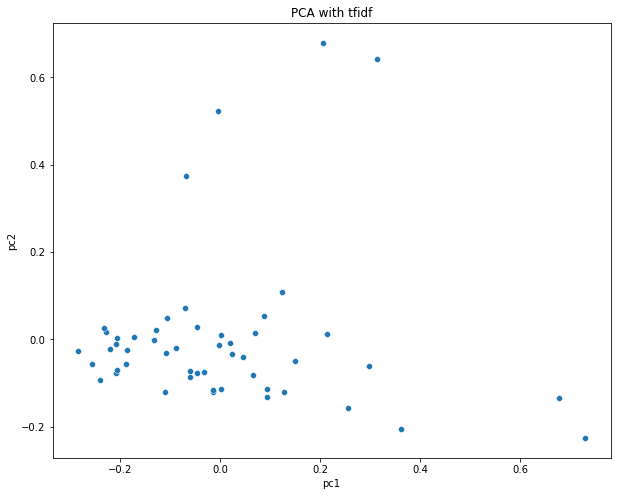

In [190]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Create PCA
pca = PCA(n_components=2)
tf2d = pca.fit_transform(tfidf)
tf_pca = pd.DataFrame(data=tf2d, columns=["pc1", "pc2"])

# Graph
plt.figure(figsize=(10, 8))
plt.title("PCA with tfidf")
sns.scatterplot(data=tf_pca, x="pc1", y="pc2")